In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#Load the dataset
df = pd.read_csv("C:\\Users\\suhan\\Good_Food_Purchasing_Data.csv")

### Inspection of data

In [67]:
# Display first 10 rows
print("First few rows of the dataset:")
print(df.head(10))

First few rows of the dataset:
                                  Agency Time Period   Food Product Group  \
0  Administration for Childrens Services   2018-2019                Meals   
1  Administration for Childrens Services   2018-2019                Meals   
2  Administration for Childrens Services   2018-2019                Meals   
3  Administration for Childrens Services   2018-2019            Beverages   
4  Administration for Childrens Services   2018-2019  Condiments & Snacks   
5  Administration for Childrens Services   2018-2019                Meals   
6  Administration for Childrens Services   2018-2019                Meals   
7  Administration for Childrens Services   2018-2019                Meals   
8  Administration for Childrens Services   2018-2019            Beverages   
9  Administration for Childrens Services   2018-2019                Meals   

  Food Product Category                           Product Name  \
0                 Meals            baby food, dinner, a

In [68]:
# Show basic info
print("\nDataset Info Before Cleaning:")
df.info()


Dataset Info Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17208 entries, 0 to 17207
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agency                 17208 non-null  object 
 1   Time Period            17208 non-null  object 
 2   Food Product Group     17208 non-null  object 
 3   Food Product Category  17208 non-null  object 
 4   Product Name           17207 non-null  object 
 5   Product Type           17208 non-null  object 
 6   Origin Detail          15059 non-null  object 
 7   Distributor            16297 non-null  object 
 8   Vendor                 16722 non-null  object 
 9   # of Units             17152 non-null  float64
 10  Total Weight in lbs    17150 non-null  float64
 11  Total Cost             3767 non-null   float64
dtypes: float64(3), object(9)
memory usage: 1.6+ MB


In [69]:
# Check missing values
print("\nMissing values before filling:")
print(df.isnull().sum())


Missing values before filling:
Agency                       0
Time Period                  0
Food Product Group           0
Food Product Category        0
Product Name                 1
Product Type                 0
Origin Detail             2149
Distributor                911
Vendor                     486
# of Units                  56
Total Weight in lbs         58
Total Cost               13441
dtype: int64


In [70]:

# Replace NaN with "No record" in object columns
object_cols = ['Product Name', 'Origin Detail', 'Distributor', 'Vendor']
for col in object_cols:
    df[col] = df[col].fillna("No record")

In [71]:
# Replace NaN in numeric columns with 0 and convert to numeric
df["# of Units"] = pd.to_numeric(df["# of Units"].fillna(0), errors='coerce')
df["Total Weight in lbs"] = pd.to_numeric(df["Total Weight in lbs"].fillna(0), errors='coerce')
df["Total Cost"] = pd.to_numeric(df["Total Cost"].fillna(0), errors='coerce')

# Drop any remaining rows with NaN values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Final info
print("\nDataset Info After Cleaning:")
df.info()

# Check if any NaNs are left
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())



Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 17203 entries, 0 to 17207
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agency                 17203 non-null  object 
 1   Time Period            17203 non-null  object 
 2   Food Product Group     17203 non-null  object 
 3   Food Product Category  17203 non-null  object 
 4   Product Name           17203 non-null  object 
 5   Product Type           17203 non-null  object 
 6   Origin Detail          17203 non-null  object 
 7   Distributor            17203 non-null  object 
 8   Vendor                 17203 non-null  object 
 9   # of Units             17203 non-null  float64
 10  Total Weight in lbs    17203 non-null  float64
 11  Total Cost             17203 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.7+ MB

Missing values after cleaning:
Agency                   0
Time Period              0


In [74]:
# Group by category and sum total cost
category_spending = df.groupby('Food Product Category')['Total Cost'].sum().reset_index()

# Sort in descending order
category_spending = category_spending.sort_values(by='Total Cost', ascending=False)

# Add hue column (used for custom palette)
category_spending['Hue'] = category_spending['Food Product Category']


In [75]:
df.isnull().sum()

Agency                   0
Time Period              0
Food Product Group       0
Food Product Category    0
Product Name             0
Product Type             0
Origin Detail            0
Distributor              0
Vendor                   0
# of Units               0
Total Weight in lbs      0
Total Cost               0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17203 entries, 0 to 17207
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agency                 17203 non-null  object 
 1   Time Period            17203 non-null  object 
 2   Food Product Group     17203 non-null  object 
 3   Food Product Category  17203 non-null  object 
 4   Product Name           17203 non-null  object 
 5   Product Type           17203 non-null  object 
 6   Origin Detail          17203 non-null  object 
 7   Distributor            17203 non-null  object 
 8   Vendor                 17203 non-null  object 
 9   # of Units             17203 non-null  float64
 10  Total Weight in lbs    17203 non-null  float64
 11  Total Cost             17203 non-null  float64
dtypes: float64(3), object(9)
memory usage: 1.7+ MB


In [77]:
df.isnull().sum()

Agency                   0
Time Period              0
Food Product Group       0
Food Product Category    0
Product Name             0
Product Type             0
Origin Detail            0
Distributor              0
Vendor                   0
# of Units               0
Total Weight in lbs      0
Total Cost               0
dtype: int64

In [78]:
df.describe()

,# of Units,Total Weight in lbs,Total Cost
count,1.720300e+04,1.720300e+04,1.720300e+04
mean,1.910143e+04,2.877204e+04,3.062351e+04
std,5.978704e+05,3.255184e+05,2.067899e+05
min,-3.600000e+01,-2.330000e+02,0.000000e+00
25%,3.000000e+00,2.100000e+01,0.000000e+00
50%,1.700000e+01,1.440000e+02,0.000000e+00
75%,2.090000e+02,1.784500e+03,0.000000e+00
max,5.050947e+07,2.525474e+07,9.110741e+06


In [79]:
df.duplicated().sum()

np.int64(0)

In [80]:
df.drop_duplicates()

,Agency,Time Period,Food Product Group,Food Product Category,Product Name,Product Type,Origin Detail,Distributor,Vendor,# of Units,Total Weight in lbs,Total Cost
0,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 2 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,100.0,560.0
1,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, dinner, assorted","Stage 3 Baby Food Dinner, Assorted Variety",Beech-Nut,Babylab Inc.,Babylab Inc.,40.0,106.0,600.0
2,Administration for Childrens Services,2018-2019,Meals,Meals,"baby food, formula","Premium Nursette Ready-to-Feed Infant Formula,...",Enfamil,Babylab Inc.,Babylab Inc.,200.0,1200.0,16200.0
3,Administration for Childrens Services,2018-2019,Beverages,Beverages,"juice, fruit punch, ss","100% Juice Variety Pack, 4 fl oz bottles",Enfamil,Babylab Inc.,Babylab Inc.,100.0,600.0,1940.0
4,Administration for Childrens Services,2018-2019,Condiments & Snacks,Condiments & Snacks,"cereal, baby, oatmeal",Single Grain Oatmeal Baby Cereal,Enfamil,Babylab Inc.,Babylab Inc.,10.0,60.0,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17203,Department of Education,2020-2021,Produce,Vegetables,"vegetable, blend, frozen, commodity",Veg Mixed Vegetable No Salt Added Frzn USDA (VO),"NA, NA",No record,No record,9239.0,0.0,49463.0
17204,Department of Education,2020-2021,Seafood,Seafood,"fish, patty, breaded",Fish Breaded Patty,"NA, New Hampshire",No record,No record,7316.0,0.0,164246.0
17205,Department of Education,2020-2021,Seafood,Seafood,"tuna, light, canned",Fish Tuna Light Can,"Golbon, NA",FoodCo,FoodCo,1978.0,49450.0,130101.0
17206,Department of Education,2020-2021,Seafood,Seafood,"tuna, light, canned",Fish Tuna Light Can,"Golbon, NA",Teri Nichols,Teri Nichols,2903.0,72575.0,167341.0


In [81]:
df.duplicated().sum()

np.int64(0)

# Analysis 

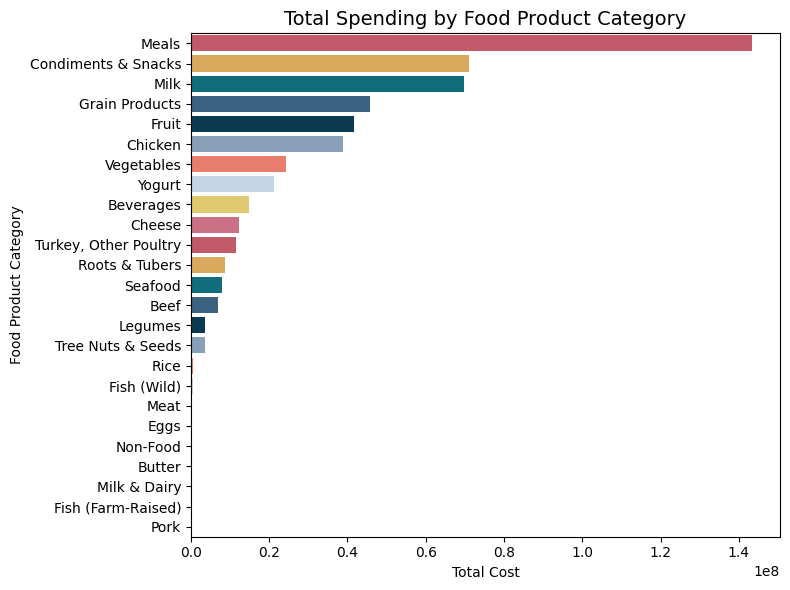

In [50]:
# Objective-1  Total Spending by Food Product Category

# Group by Food Product Category and calculate total spending
category_spending = df.groupby('Food Product Category')['Total Cost'].sum().reset_index()

# Sort values by total cost in descending order
category_spending = category_spending.sort_values(by='Total Cost', ascending=False)

# Create a dummy 'hue' column just for palette usage
category_spending['Hue'] = category_spending['Food Product Category']

# Define Virginia custom palette
virginia_colors = [
    '#D1495B', '#EDAE49', '#00798C', '#30638E', '#003D5B',
    '#80A1C1', '#FF6F59', '#BFD7EA', '#F4D35E', '#DA627D'
]

# If there are more categories than colors, the palette will repeat
color_palette = dict(zip(category_spending['Hue'], virginia_colors * ((len(category_spending) // len(virginia_colors)) + 1)))

# Plot horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    data=category_spending,
    y='Food Product Category',
    x='Total Cost',
    hue='Hue',
    palette=color_palette,
    dodge=False,
    legend=False
)
plt.title('Total Spending by Food Product Category', fontsize=14)
plt.xlabel('Total Cost')
plt.ylabel('Food Product Category')
plt.tight_layout()
plt.show()


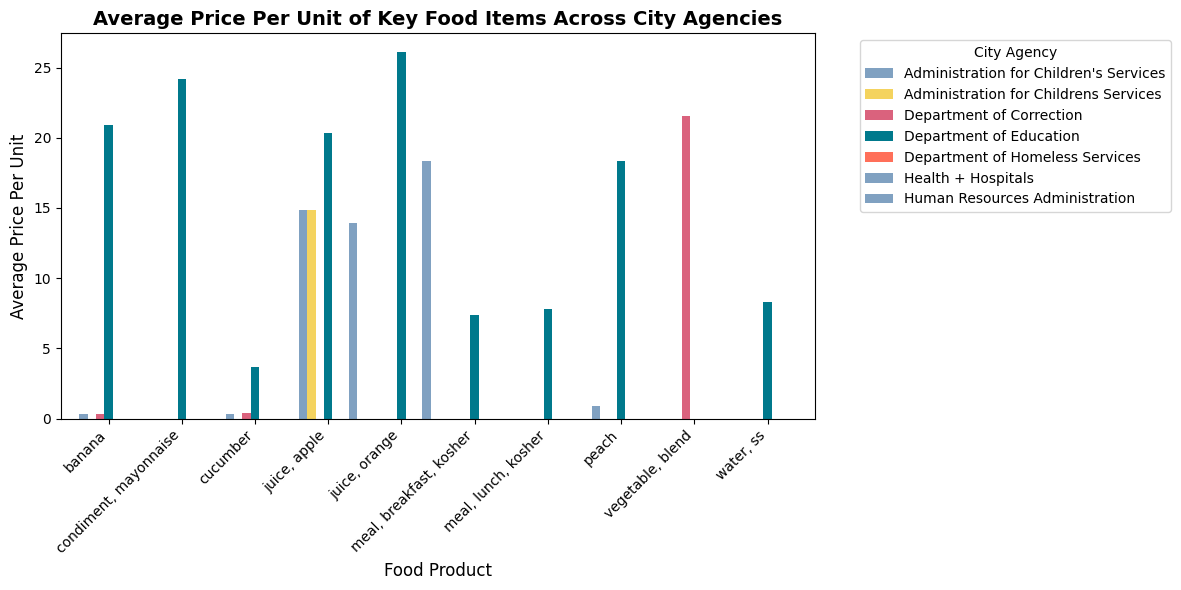

In [51]:
#Objective-2 Average Price Per Unit of Key Food Items Across City Agencies
# Clean column names
df.columns = df.columns.str.strip()

# Calculate Price Per Unit
df["Price Per Unit"] = df["Total Cost"] / df["# of Units"]

# Select the top 10 most frequently purchased food products
top_products = df["Product Name"].value_counts().nlargest(10).index.tolist()

# Filter data to include only these top products
key_items_df = df[df["Product Name"].isin(top_products)]

# Create pivot table: rows = Product Name, columns = Agency, values = average Price Per Unit
grouped_data = key_items_df.pivot_table(
    index="Product Name",
    columns="Agency",
    values="Price Per Unit",
    aggfunc="mean"
)

# Virginia color palette
virginia_palette = ['#80A1C1','#F4D35E','#DA627D','#00798C','#FF6F59','#80A1C1']

# Plot grouped bar chart with Virginia colors
ax = grouped_data.plot(
    kind="bar",
    figsize=(12, 6),
    width=0.8,
    color=virginia_palette[:len(grouped_data.columns)]  # One color per agency
)

# Chart formatting
plt.title("Average Price Per Unit of Key Food Items Across City Agencies", fontsize=14, weight='bold')
plt.xlabel("Food Product", fontsize=12)
plt.ylabel("Average Price Per Unit", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="City Agency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


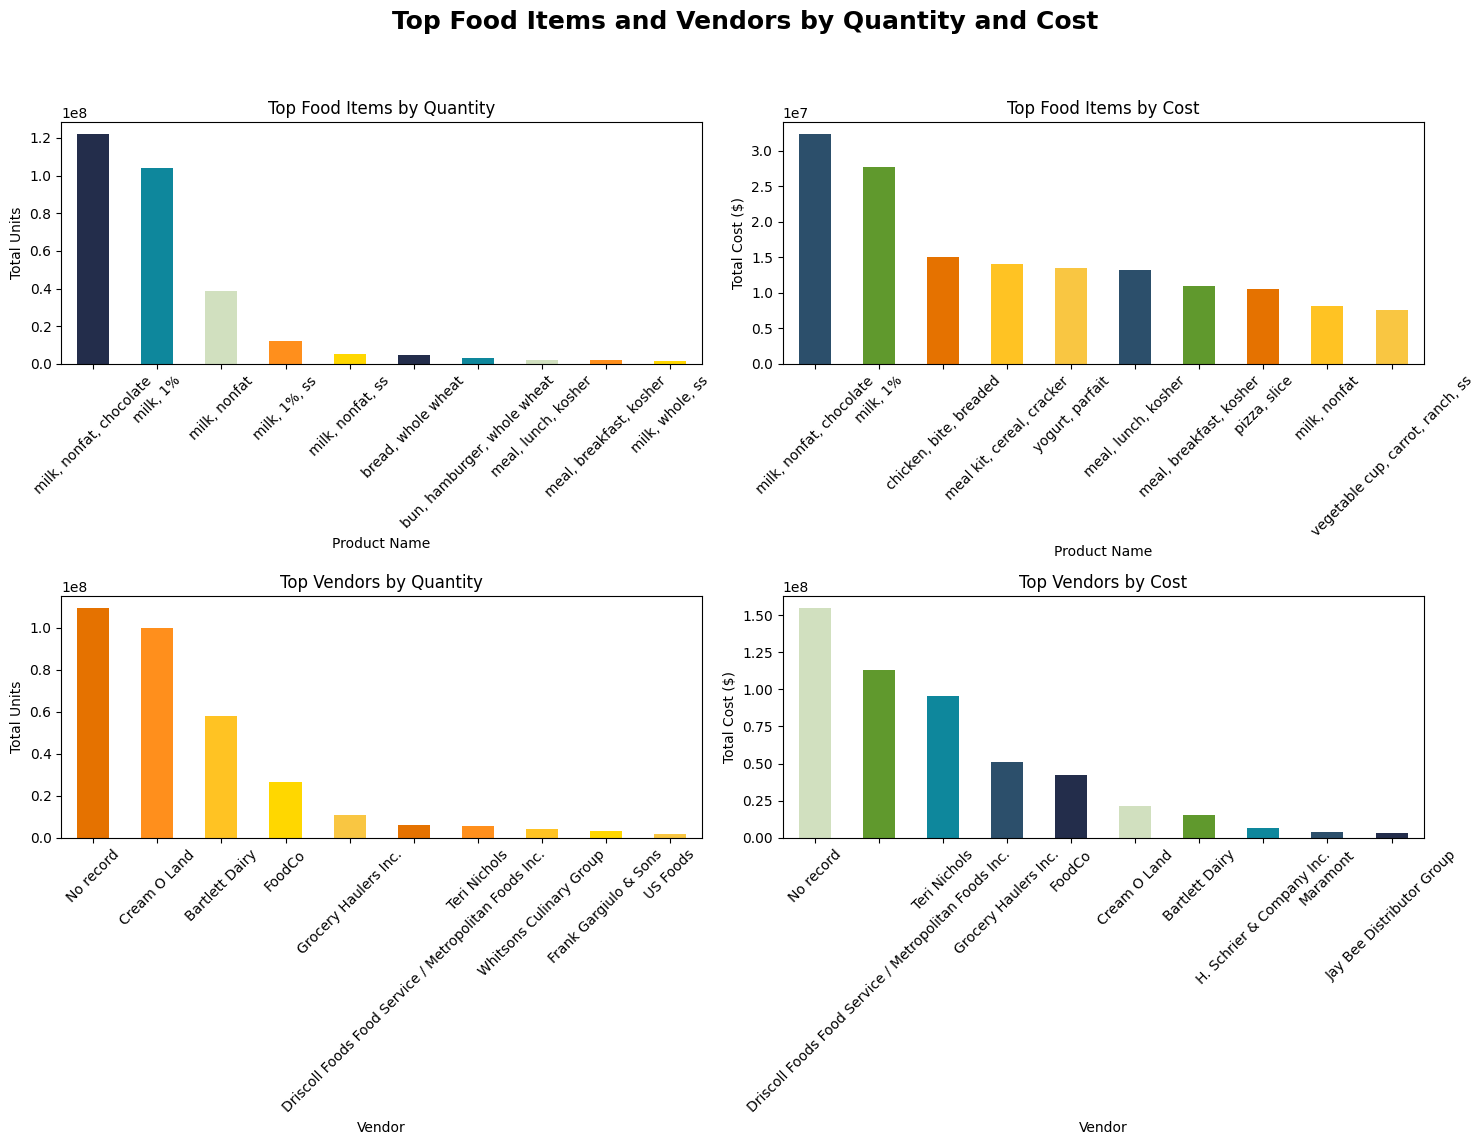

In [52]:
# Objective-3 Top Food Items and Vendors by Quantity and Cost

# Virginia color palette (blue and orange tones)
virginia_colors = ["#232D4B", "#2C4F6B", "#0E879C", "#60992D", "#D1E0BF", 
                  "#E57200", "#FF8F1C", "#FFC323", "#FFD700", "#F9C642"]

df = df.drop_duplicates()
df = df.dropna(subset=['Product Name'])
df = df.dropna(subset=['Vendor'])
df = df.dropna(subset=['Total Cost'])

# Compute top 10 items and vendors by quantity and cost
item_qty = df.groupby("Product Name")["# of Units"].sum().nlargest(10)
item_cost = df.groupby("Product Name")["Total Cost"].sum().nlargest(10)
vendor_qty = df.groupby("Vendor")["# of Units"].sum().nlargest(10)
vendor_cost = df.groupby("Vendor")["Total Cost"].sum().nlargest(10)

# Plot setup with distinct Virginia colors for each subplot
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Top Food Items and Vendors by Quantity and Cost", fontsize=18, weight='bold')

# Different color schemes for each plot
item_qty.plot(kind="bar", ax=ax[0, 0], color=virginia_colors[0:10:2], title="Top Food Items by Quantity")  # Blues & greens
ax[0, 0].set_ylabel("Total Units")

item_cost.plot(kind="bar", ax=ax[0, 1], color=virginia_colors[1:10:2], title="Top Food Items by Cost")  # Alternate blues & greens
ax[0, 1].set_ylabel("Total Cost ($)")

vendor_qty.plot(kind="bar", ax=ax[1, 0], color=virginia_colors[5:], title="Top Vendors by Quantity")  # Oranges & yellows
ax[1, 0].set_ylabel("Total Units")

vendor_cost.plot(kind="bar", ax=ax[1, 1], color=virginia_colors[4::-1], title="Top Vendors by Cost")  # Reversed blues & greens
ax[1, 1].set_ylabel("Total Cost ($)")

# Rotate x labels
for a in ax.flat:
    a.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

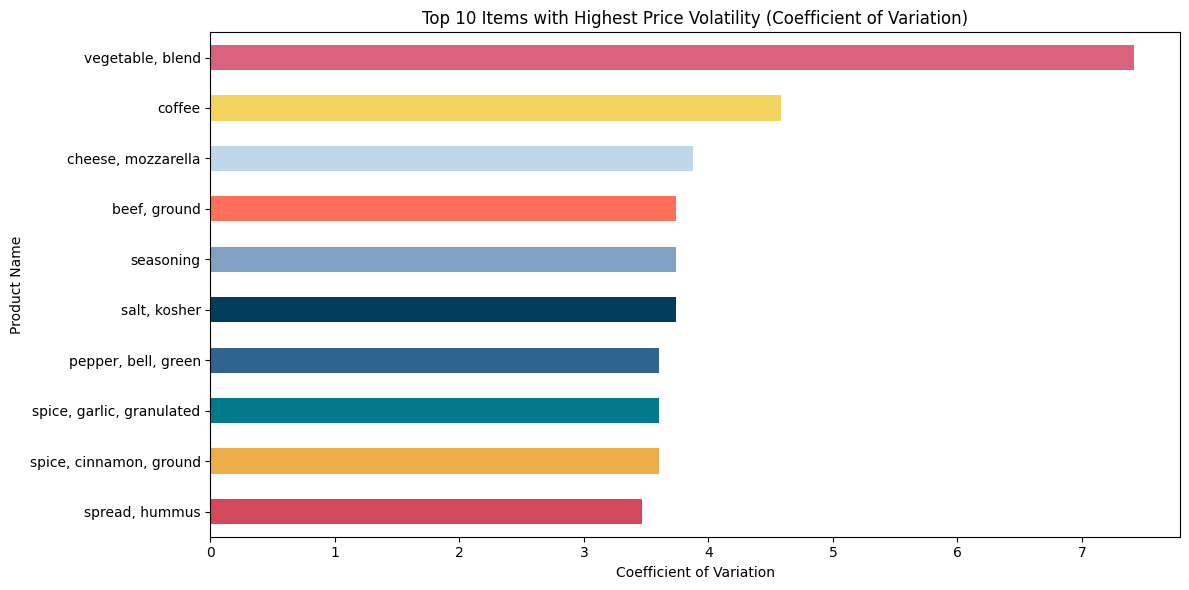

In [53]:
# Objective-4 Identify the food items with the most significant price fluctuations over time.
# Virginia color palette
virginia_colors = ['#D1495B', '#EDAE49', '#00798C', '#30638E', '#003D5B',
                   '#80A1C1', '#FF6F59', '#BFD7EA', '#F4D35E', '#DA627D']

# Calculate price per unit for each item
df['Price per Unit'] = df['Total Cost'] / df['# of Units']

# Get items with sufficient data points
item_counts = df['Product Name'].value_counts()
common_items = item_counts[item_counts > 3].index

# Calculate coefficient of variation for price
price_std = df[df['Product Name'].isin(common_items)].groupby('Product Name')['Price per Unit'].std()
price_mean = df[df['Product Name'].isin(common_items)].groupby('Product Name')['Price per Unit'].mean()
price_variation = price_std / price_mean

top_volatile = price_variation.nlargest(10)

# Visualization
plt.figure(figsize=(12, 6))
top_volatile.sort_values().plot(kind='barh', color=virginia_colors[:len(top_volatile)])
plt.title('Top 10 Items with Highest Price Volatility (Coefficient of Variation)')
plt.xlabel('Coefficient of Variation')
plt.tight_layout()
plt.show()


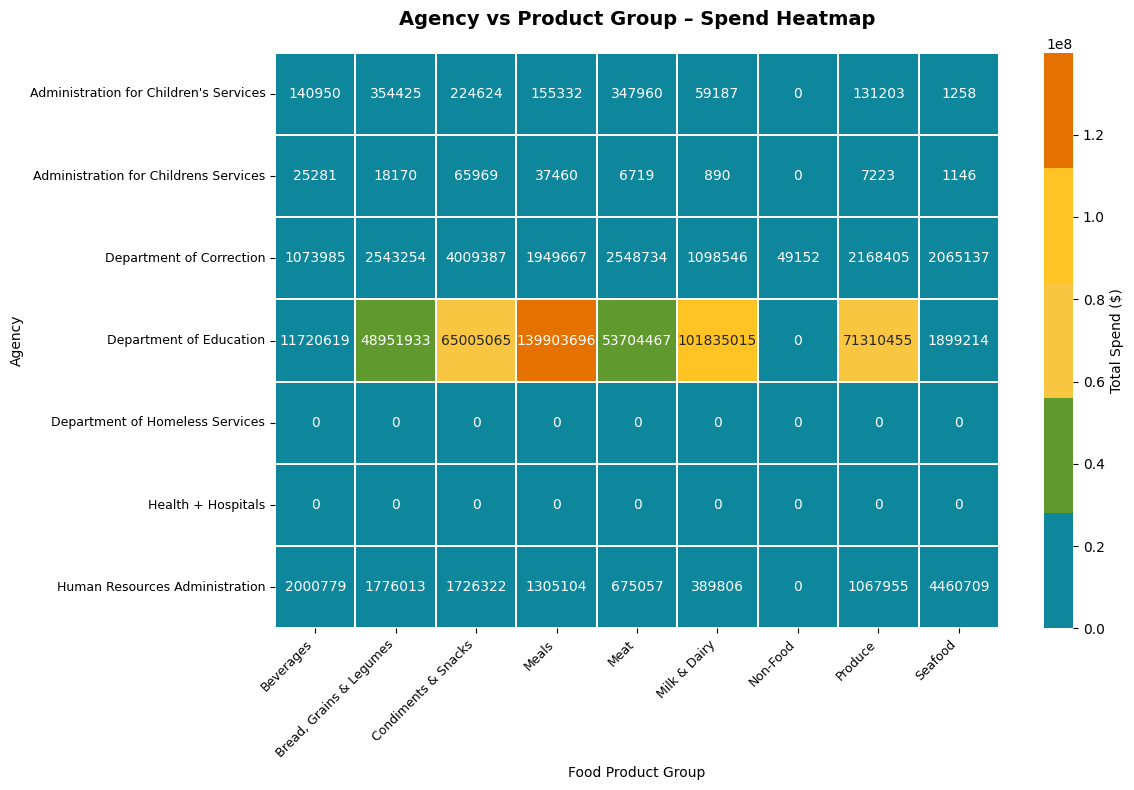

In [54]:
# Objective-5 Agency vs Product Group
# Virginia-inspired divergent palette (cool blues to warm oranges)
virginia_diverging = ["#0E879C", "#60992D", "#F9C642", "#FFC323", "#E57200"]

# Create heatmap data
heat_data = df.pivot_table(
    index='Agency', 
    columns='Food Product Group', 
    values='Total Cost', 
    aggfunc='sum'
).fillna(0)

# Plot with new Virginia colors
plt.figure(figsize=(12, 8))  # Slightly taller for readability
sns.heatmap(
    heat_data,
    annot=True,
    fmt=".0f",
    cmap=virginia_diverging,
    linewidths=0.3,
    linecolor="white",  # Cleaner grid lines
    cbar_kws={'label': 'Total Spend ($)'}  # Add color bar label
)

# Style enhancements
plt.title('Agency vs Product Group – Spend Heatmap', 
          fontsize=14, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Food Product Group', fontsize=10)
plt.ylabel('Agency', fontsize=10)

plt.tight_layout()
plt.show()

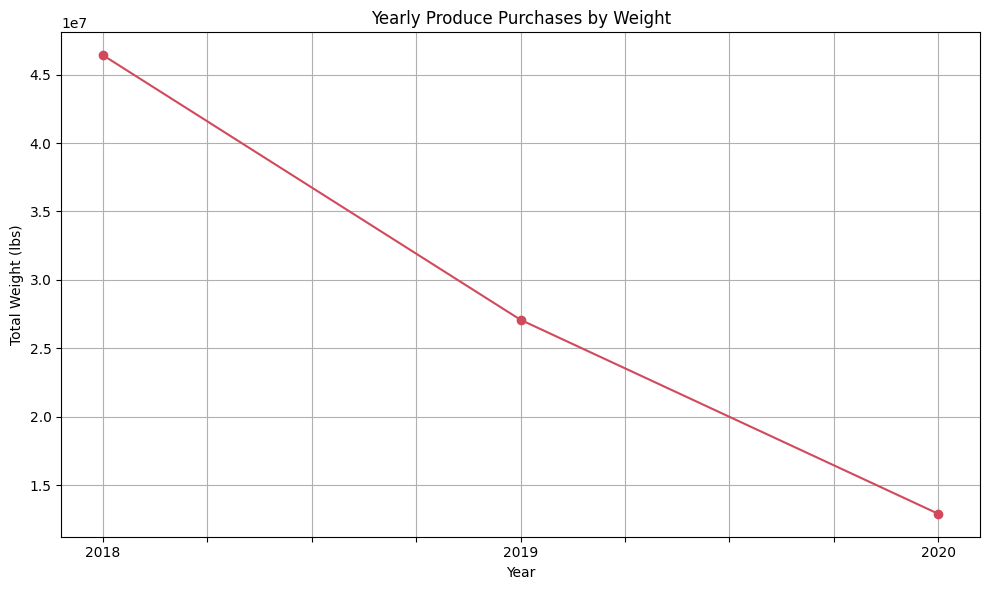

In [55]:
# Objective-6 Track the year-over-year changes in the total quantity of fruits and vegetables purchased.

# Filter for fruits and vegetables
produce = df[df['Food Product Group'] == 'Produce'].copy()

# Extract year from Time Period
produce.loc[:, 'Year'] = produce['Time Period'].str[:4]

# Calculate total quantity by year
yearly_produce = produce.groupby('Year')['Total Weight in lbs'].sum()

# Virginia palette
virginia_colors = ['#D1495B', '#EDAE49', '#00798C', '#30638E', '#003D5B',
                   '#80A1C1', '#FF6F59', '#BFD7EA', '#F4D35E', '#DA627D']

# Visualization with Virginia color
plt.figure(figsize=(10, 6))
yearly_produce.plot(kind='line', marker='o', color=virginia_colors[0])
plt.title('Yearly Produce Purchases by Weight')
plt.ylabel('Total Weight (lbs)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()


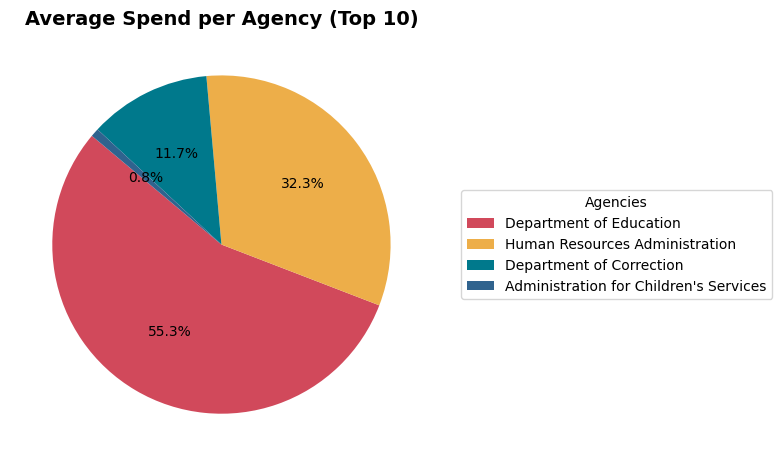

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Good_Food_Purchasing_Data.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Step 1: Drop rows where 'Agency' or 'Total Cost' is NaN
df_clean = df[['Agency', 'Total Cost']].dropna()

# Step 2: Standardize agency names (fix known typo)
df_clean['Agency'] = df_clean['Agency'].replace({
    "Administration for Childrens Services": "Administration for Children's Services"
})

# Step 3: Group by 'Agency' and calculate average Total Cost
avg_spend = df_clean.groupby('Agency')['Total Cost'].mean()

# Step 4: Take top 10 agencies by average spend
top_agencies = avg_spend.nlargest(10)

# Step 5: Define Virginia color palette (non-repeating)
virginia_palette = ['#D1495B', '#EDAE49', '#00798C', '#30638E', '#003D5B',
                    '#80A1C1', '#FF6F59', '#BFD7EA', '#F4D35E', '#DA627D']

# Step 6: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_agencies.values,
    labels=None,  # Add labels in legend to avoid overlap
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.25,   # Push labels outward
    colors=virginia_palette
)

# Add legend outside the pie
plt.legend(labels=top_agencies.index, title="Agencies", bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.title('Average Spend per Agency (Top 10)', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


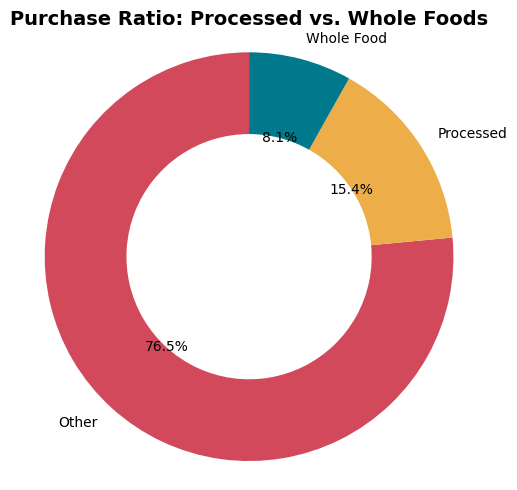

In [58]:
#Objective-8 Purchase Ratio: Processed vs. Whole Foods
processed_keywords = ["cookie", "ketchup", "chip", "cracker", "juice", "sauce", "snack", "pudding", "cereal"]
whole_keywords = ["legume", "grain", "vegetable", "fruit", "rice", "bean", "wheat", "produce"]

# Function to classify based on product name
def classify_food(item_name):
    name = str(item_name).lower()
    if any(word in name for word in processed_keywords):
        return "Processed"
    elif any(word in name for word in whole_keywords):
        return "Whole Food"
    else:
        return "Other"

# Apply classification
df["Food Classification"] = df["Product Name"].apply(classify_food)

# Count and calculate percentages
classification_counts = df["Food Classification"].value_counts()
classification_percent = classification_counts / classification_counts.sum() * 100

# Updated Virginia-style palette
custom_palette = ['#D1495B', '#EDAE49', '#00798C']  # Distinct for 3 categories

# Create donut chart
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    classification_percent,
    labels=classification_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette,
    wedgeprops=dict(width=0.4),
    textprops={'fontsize': 10}
)

plt.title("Purchase Ratio: Processed vs. Whole Foods", fontsize=14, weight='bold')
plt.axis('equal')  # Keeps the chart circular
plt.tight_layout()
plt.show()


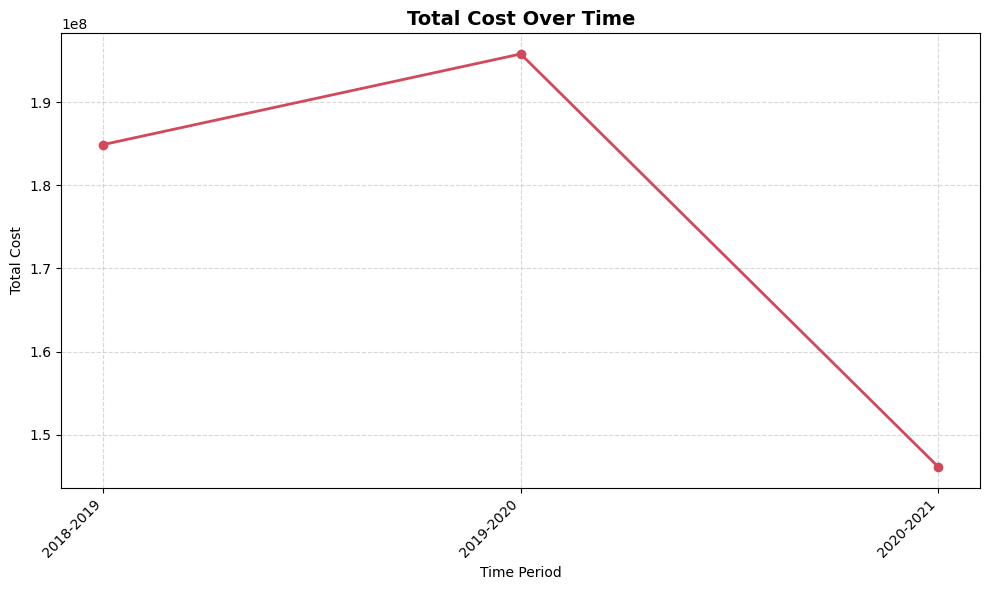

In [59]:
#Objective-9 Total Cost Over Time
df['Total Cost'] = pd.to_numeric(df['Total Cost'], errors='coerce')
df['# of Units'] = pd.to_numeric(df['# of Units'], errors='coerce')
df['Total Weight in lbs'] = pd.to_numeric(df['Total Weight in lbs'], errors='coerce')
time_cost = df.groupby('Time Period')['Total Cost'].sum()
a= '#D1495B'
# Plot
plt.figure(figsize=(10,6))
plt.plot(time_cost.index, time_cost.values, marker='o', color=a, linewidth=2)
plt.title('Total Cost Over Time', fontsize=14, weight='bold')
plt.xlabel('Time Period')
plt.ylabel('Total Cost')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

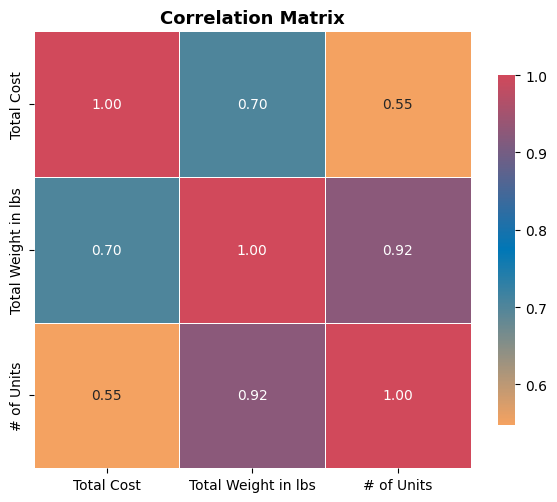

In [61]:
#Objective-10 Correlation Matrix
from matplotlib.colors import LinearSegmentedColormap
# Compute correlation matrix
corr = df[['Total Cost', 'Total Weight in lbs', '# of Units']].corr()

# Define Virginia-style gradient palette
virginia_cmap = LinearSegmentedColormap.from_list("virginia_cmap", ["#F4A261", "#0077B6", "#D1495B"])

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap=virginia_cmap, fmt=".2f", linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix', fontsize=13, weight='bold')
plt.tight_layout()
plt.show()


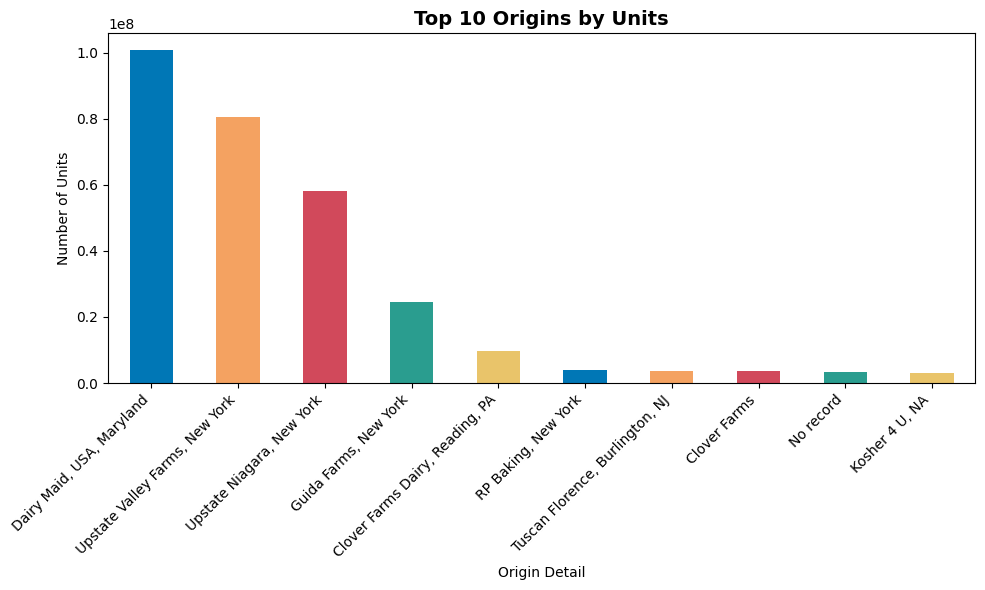

In [62]:
#Objetive-11 Top 10 Origins by Units
# Step 1: Group and get top 10 origins
origin_units = df.groupby('Origin Detail')['# of Units'].sum().nlargest(10)

# Step 2: Define Virginia color palette (cycling colors)
virginia_colors = ['#0077B6', '#F4A261', '#D1495B', '#2A9D8F', '#E9C46A'] * 2  # Repeat to cover 10 bars

# Step 3: Plot
plt.figure(figsize=(10,6))
origin_units.plot(kind='bar', color=virginia_colors)
plt.title('Top 10 Origins by Units', fontsize=14, weight='bold')
plt.ylabel('Number of Units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
